In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


creating the figures folder
(10000, 3072) (10000, 10)
(2000, 3072) (2000, 10)
epoch 0 entropy 2.3052313
epoch 0 test accuracy 0.106
epoch 0 train accuracy 0.1002
epoch 100 entropy 1.8855565
epoch 100 test accuracy 0.321
epoch 100 train accuracy 0.3248
epoch 200 entropy 1.7473845
epoch 200 test accuracy 0.3705
epoch 200 train accuracy 0.3745
epoch 300 entropy 1.6181695
epoch 300 test accuracy 0.4135
epoch 300 train accuracy 0.4208
epoch 400 entropy 1.5416951
epoch 400 test accuracy 0.441
epoch 400 train accuracy 0.4521
epoch 500 entropy 1.4070528
epoch 500 test accuracy 0.4735
epoch 500 train accuracy 0.5006
epoch 600 entropy 1.3359696
epoch 600 test accuracy 0.492
epoch 600 train accuracy 0.5295
epoch 700 entropy 1.2613579
epoch 700 test accuracy 0.505
epoch 700 train accuracy 0.5574
epoch 800 entropy 1.1749755
epoch 800 test accuracy 0.501
epoch 800 train accuracy 0.5894
epoch 900 entropy 1.0995616
epoch 900 test accuracy 0.52
epoch 900 train accuracy 0.6183
Convolution Layer 1 shape 

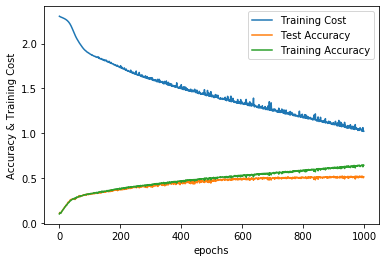

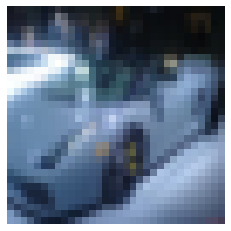

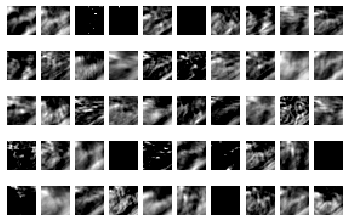

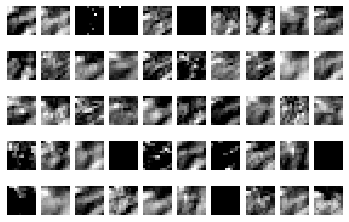

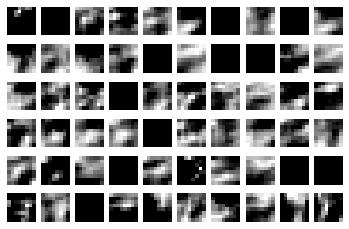

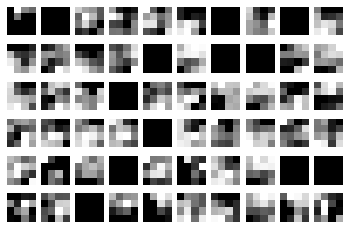

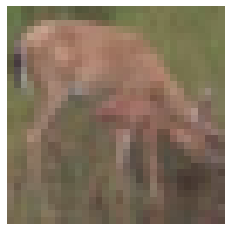

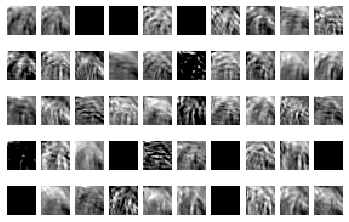

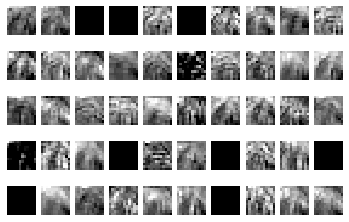

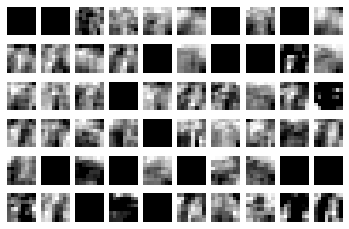

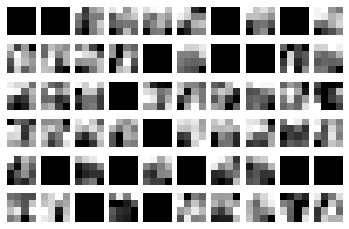

In [0]:
import math
import tensorflow as tf
import numpy as np
import pylab as plt
import pickle
import os

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')


NUM_CLASSES = 10
IMG_SIZE = 32
NUM_CHANNELS = 3
learning_rate = 0.001
epochs = 1000
batch_size = 128


seed = 10
np.random.seed(seed)
tf.set_random_seed(seed)

def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  #python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    
    labels_ = np.zeros([labels.shape[0], NUM_CLASSES])
    labels_[np.arange(labels.shape[0]), labels-1] = 1

    return data, labels_


def cnn(images):

    images = tf.reshape(images, [-1, IMG_SIZE, IMG_SIZE, NUM_CHANNELS])
    
    #Conv 1
    W_conv1 = weight_variable([9, 9, NUM_CHANNELS, 50], stddev=1.0/np.sqrt(NUM_CHANNELS*9*9), name='h_weight1')
    b_conv1 = bias_variable([50], name='h_biases1')
    u_conv1 = tf.nn.conv2d(images, W_conv1, strides=[1, 1, 1, 1], padding='VALID') + b_conv1
    h_conv1 = tf.nn.relu(u_conv1)

    #Pooling layer, max pool
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='VALID', name='h_pool1')

    #Conv 2
    W_conv2 = weight_variable([5, 5, 50, 60], stddev=1.0/np.sqrt(50*5*5), name='h_weight2' )
    b_conv2 = bias_variable([60], name='h_biases2')
    u_conv2 = tf.nn.conv2d(h_pool1, filter=W_conv2, strides=[1, 1, 1, 1], padding='VALID') + b_conv2
    h_conv2 = tf.nn.relu(u_conv2)

    #Pooling layer 2, max pool
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='h_pool2')

    #Flatten the output
    dim = h_pool2.get_shape()[1].value * h_pool2.get_shape()[2].value * h_pool2.get_shape()[3].value 
    pool_2_flat = tf.reshape(h_pool2, [-1, dim])

    #Full connected layer 
    W_fc1 = weight_variable([dim, 300], 1.0/np.sqrt(dim), name='weights_fc1')
    b_fc1 = bias_variable([300], name='bias_fc1')
    u_fc1 = tf.matmul(pool_2_flat, W_fc1) + b_fc1
    h_fc1 = tf.nn.relu(u_fc1)
	
    #Softmax
    W_fc2 = weight_variable([300, NUM_CLASSES], stddev=1.0/np.sqrt(dim), name='weights_fc2')
    b_fc2 = tf.Variable(tf.zeros([NUM_CLASSES]), name='bias_fc2')

    y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

    return W_conv1, h_conv1, h_pool1, h_conv2, h_pool2, y_conv


def weight_variable(shape, stddev, name):
    initial = tf.truncated_normal(shape, stddev=stddev)
    return tf.Variable(initial, name=name)


def bias_variable(shape, name):
    return tf.Variable(tf.zeros(shape), name=name)


def main():

    trainX, trainY = load_data('drive/My Drive/CZ4042 Neural Network project/project 2/Part A/data_batch_1')
    print(trainX.shape, trainY.shape)
    
    testX, testY = load_data('drive/My Drive/CZ4042 Neural Network project/project 2/Part A/test_batch_trim')
    print(testX.shape, testY.shape)

    trainX = (trainX - np.min(trainX, axis = 0))/np.max(trainX, axis = 0)
    testX = (testX - np.min(testX, axis = 0))/np.max(testX, axis = 0)

    # Create the model
    x = tf.placeholder(tf.float32, [None, IMG_SIZE*IMG_SIZE*NUM_CHANNELS])
    y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])
    
    W_conv1, h_conv1, h_pool1, h_conv2, h_pool2, y_conv = cnn(x)

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv)
    loss = tf.reduce_mean(cross_entropy)

    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)

    N = len(trainX)
    idx = np.arange(N)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        test_acc = []
        training_loss =[]
        train_acc = []
        for e in range(epochs):
            np.random.shuffle(idx)
            trainX, trainY = trainX[idx], trainY[idx]

            for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)):
                train_step.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})
            
            training_loss.append(loss.eval(feed_dict={x: trainX, y_: trainY}))
            train_acc.append(accuracy.eval(feed_dict={x: trainX, y_: trainY}))
            test_acc.append(accuracy.eval(feed_dict={x: testX, y_: testY}))

            if e%100 == 0:
              print('epoch', e, 'entropy', training_loss[e])
              print('epoch', e, 'test accuracy', test_acc[e])
              print('epoch', e, 'train accuracy', train_acc[e])

        # Question 1A
        plt.figure()
        plt.plot(range(epochs), training_loss)
        plt.plot(range(epochs), test_acc)
        plt.plot(range(epochs), train_acc)
        
        plt.xlabel('epochs')
        plt.ylabel('Accuracy & Training Cost')
        plt.legend(['Training Cost', 'Test Accuracy', 'Training Accuracy'],loc='upper right')
        plt.savefig('./figures/Training_cost.png')      

        # Question 1B
        for i in range(2):
          # Test pattern
          ind = np.random.randint(low=0, high=2000)
          X = testX[ind,:]

          plt.figure()
          plt.gray()
          X_show = X.reshape(NUM_CHANNELS, IMG_SIZE, IMG_SIZE).transpose(1, 2, 0)
          plt.axis('off')
          plt.imshow(X_show)
          plt.savefig('./sample_pic.png')

          h_conv1_, h_pool1_, h_conv2_, h_pool2_ = sess.run([h_conv1, h_pool1, h_conv2, h_pool2],
                                                            {x: X_show.reshape(1, 3*32*32)})
          
          plt.figure()
          plt.gray()
          plt.title('Convolution Layer 1')
          h_conv1_ = np.array(h_conv1_)
          print('Convolution Layer 1 shape', h_conv1_.shape)
          for i in range(50):
              plt.subplot(5, 10, i+1)
              plt.axis('off')
              plt.imshow(h_conv1_[0,:,:,i])
          plt.savefig('./figures/Conv_layer_1.png')

          plt.figure()
          plt.gray()
          plt.title('Pooling Layer 1')
          h_pool1_ = np.array(h_pool1_)
          print('Pooling Layer 1 shape', h_pool1_.shape)
          for i in range(50):
              plt.subplot(5, 10, i+1)
              plt.axis('off')
              plt.imshow(h_pool1_[0,:,:,i])
          plt.savefig('./figures/Pool_layer_1.png')

          plt.figure()
          plt.gray()
          plt.title('Convolution Layer 2')
          h_conv2_ = np.array(h_conv2_)
          print('Convolution Layer 2 shape', h_conv2_.shape)
          for i in range(60):
              plt.subplot(6, 10, i+1)
              plt.axis('off')
              plt.imshow(h_conv2_[0,:,:,i])
          plt.savefig('./figures/Conv_layer_2.png')

          plt.figure()
          plt.gray()
          plt.title('Pooling Layer 2')
          h_pool2_ = np.array(h_pool2_)
          print('Pooling Layer 2 shape', h_pool2_.shape)
          for i in range(60):
              plt.subplot(6, 10, i+1)
              plt.axis('off')
              plt.imshow(h_pool2_[0,:,:,i])
          plt.savefig('./figures/Pool_layer_2.png')

        plt.show()
       
if __name__ == '__main__':
  main()
